# Clusteing NYC neighborhoods by pizza places prices

Importing The required libraries

In [13]:
import folium
import pandas as pd
import json
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import numpy as np
from IPython.display import newyork_data.json

get NY City Latitude and Longitude:

In [2]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
NY_latitude = location.latitude
NY_longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(NY_latitude, NY_longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


## Get All  NY City  neighbourhoods LLs


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
neighborhoods_data = newyork_data['features']

define a Dataframe that holds the neighbourhoods LLs

In [6]:

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

extract the data from the JSON file to the DataFrame

In [7]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
print('number id neighbouhoods: ',neighborhoods.shape[0])
neighborhoods.head()

number id neighbouhoods:  306


Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [9]:
Boroughs =  list(neighborhoods['Borough'].unique())

making colors dictionary based on boroughs

In [10]:
colors1 = ['red','blue','green','yellow','magenta']
color_dictionary = dict(zip(Boroughs, colors1))
color_dictionary

{'Bronx': 'red',
 'Manhattan': 'blue',
 'Brooklyn': 'green',
 'Queens': 'yellow',
 'Staten Island': 'magenta'}

print NY neighbourhoods 

In [11]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[NY_latitude, NY_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color_dictionary[borough],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

in case github didn't render the map:

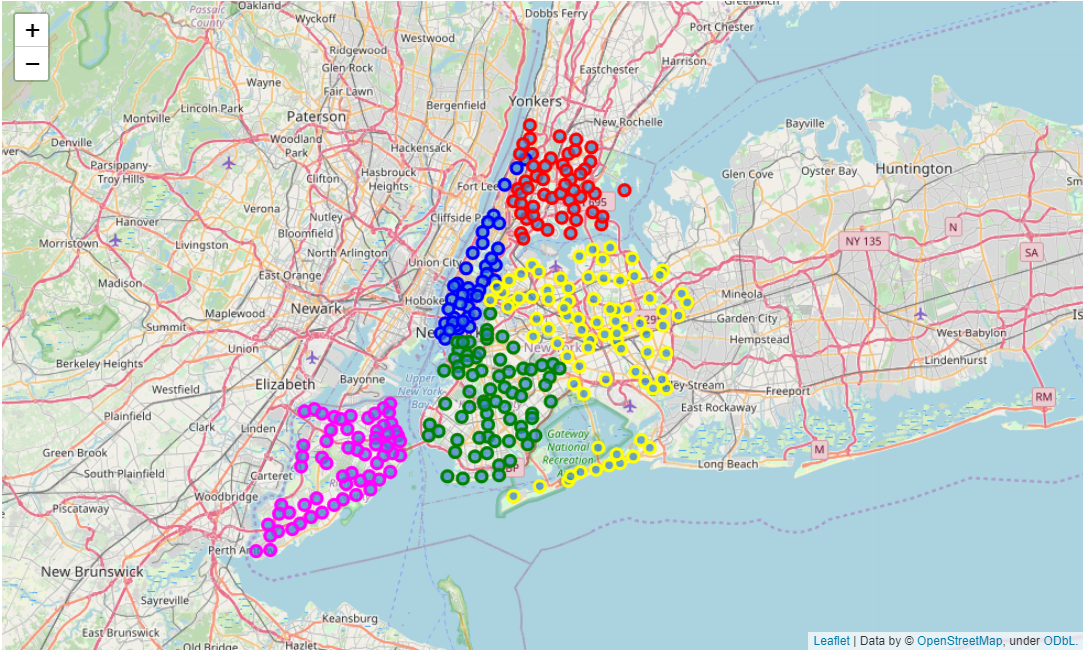

In [14]:
Image(filename='Images/NYC by boroughs.png') 

In [15]:
neighborhoods.shape

(306, 4)

Enter Your Foursquare data

In [17]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20200409' # Foursquare API version

If you gath ered the data load it:

In [19]:
df = pd.read_csv('my_precious_data.csv')

### The Process of Gathering the data (Just first time then you can read it from the file as above) 

In [71]:
df = pd.DataFrame(columns= ['Latitude','Longitude','Borough','Neighborhood','price1','price2','price3','price4'])

In [72]:
df

Empty DataFrame
Columns: [Latitude, Longitude, Borough, Neighborhood, price1, price2, price3, price4]
Index: []

In [88]:
step=0
failed=[]
for lat, lng ,borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    print('step: ',step)
    try:
        counter = []
        for i in range(1,5):
            url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&section=pizza place,pizza&client_secret={}&v={}&ll={},{}&radius={}&limit={}&price={}'\
            .format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,1000,100,i)
            results = requests.get(url).json()
            venues = results['response']['groups'][0]['items']
            normalized_venues = json_normalize(venues) 
            counter.append(normalized_venues.shape[0])
        df=df.append([{'Latitude':lat,'Longitude':lng,'Borough':borough,'Neighborhood':neighborhood\
                    ,'price1':counter[0],'price2':counter[1],'price3':counter[2],'price4':counter[3]}])
    except:
        print('step: ',step ,'failded')
        failed.append(step)

    step+=1
    

step:  0


C:\Users\ASUS\Anaconda3\envs\DataScienceEnv\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if sys.path[0] == '':


step:  1
step:  2
step:  3
step:  4
step:  5
step:  6
step:  7
step:  8
step:  9
step:  10
step:  11
step:  12
step:  13
step:  14
step:  15
step:  16
step:  17
step:  18
step:  19
step:  20
step:  21
step:  22
step:  23
step:  24
step:  25
step:  26
step:  27
step:  28
step:  29
step:  30
step:  31
step:  32
step:  33
step:  34
step:  35
step:  36
step:  37
step:  38
step:  39
step:  40
step:  41
step:  42
step:  43
step:  44
step:  45
step:  46
step:  47
step:  48
step:  49
step:  50
step:  51
step:  52
step:  53
step:  54
step:  55
step:  56
step:  57
step:  58
step:  59
step:  60
step:  61
step:  62
step:  63
step:  64
step:  65
step:  66
step:  67
step:  68
step:  69
step:  70
step:  71
step:  72
step:  73
step:  74
step:  75
step:  76
step:  77
step:  78
step:  79
step:  80
step:  81
step:  82
step:  83
step:  84
step:  85
step:  86
step:  87
step:  88
step:  89
step:  90
step:  91
step:  92
step:  93
step:  94
step:  95
step:  96
step:  97
step:  98
step:  99
step:  100
step:  1

In [109]:
df

Latitude  Longitude        Borough               Neighborhood price1  \
0  40.894705 -73.847201          Bronx                  Wakefield     20   
0  40.874294 -73.829939          Bronx                 Co-op City     23   
0  40.887556 -73.827806          Bronx                Eastchester     20   
0  40.895437 -73.905643          Bronx                  Fieldston     20   
0  40.890834 -73.912585          Bronx                  Riverdale     15   
0  40.881687 -73.902818          Bronx                Kingsbridge     40   
0  40.876551 -73.910660      Manhattan                Marble Hill     25   
0  40.898273 -73.867315          Bronx                   Woodlawn     24   
0  40.877224 -73.879391          Bronx                    Norwood     30   
0  40.881039 -73.857446          Bronx             Williamsbridge     22   
0  40.866858 -73.835798          Bronx                 Baychester     28   
0  40.857413 -73.854756          Bronx             Pelham Parkway     38   
0  40.847247 -73.786488          Bronx                City Island      6   
0  40.870185 -73.885512          Bronx               Bedford Park     29   
0  40.855727 -73.910416          Bronx         University Heights     25   
0  40.847898 -73.919672          Bronx             Morris Heights     26   
0  40.860997 -73.896427          Bronx                    Fordham     60   
0  40.842696 -73.887356          Bronx               East Tremont     29   
0  40.839475 -73.877745          Bronx                 West Farms     18   
0  40.836623 -73.926102          Bronx               High  Bridge     10   
0  40.819754 -73.909422          Bronx                    Melrose     34   
0  40.806239 -73.916100          Bronx                 Mott Haven     25   
0  40.801664 -73.913221          Bronx                Port Morris     12   
0  40.815099 -73.895788          Bronx                   Longwood     27   
0  40.809730 -73.883315          Bronx                Hunts Point      7   
0  40.823592 -73.901506          Bronx                 Morrisania     26   
0  40.821012 -73.865746          Bronx                  Soundview     21   
0  40.806551 -73.854144          Bronx               Clason Point      0   
0  40.815109 -73.816350          Bronx                Throgs Neck     11   
0  40.844246 -73.824099          Bronx               Country Club     26   
0  40.837938 -73.856003          Bronx                Parkchester     30   
0  40.840619 -73.842194          Bronx         Westchester Square     26   
0  40.843608 -73.866299          Bronx                   Van Nest     23   
0  40.847549 -73.850402          Bronx                Morris Park     37   
0  40.857277 -73.888452          Bronx                    Belmont     48   
0  40.881395 -73.917190          Bronx             Spuyten Duyvil     15   
0  40.908543 -73.904531          Bronx            North Riverdale     15   
0  40.850641 -73.832074          Bronx                 Pelham Bay     26   
0  40.826580 -73.826203          Bronx              Schuylerville     21   
0  40.821986 -73.813885          Bronx             Edgewater Park     18   
0  40.819014 -73.848027          Bronx                Castle Hill      9   
0  40.871371 -73.863324          Bronx                  Olinville     34   
0  40.862966 -73.841612          Bronx             Pelham Gardens     13   
0  40.834284 -73.915589          Bronx                  Concourse     22   
0  40.829774 -73.850535          Bronx                  Unionport     32   
0  40.884561 -73.848083          Bronx                   Edenwald     16   
0  40.625801 -74.030621       Brooklyn                  Bay Ridge     51   
0  40.611009 -73.995180       Brooklyn                Bensonhurst     37   
0  40.645103 -74.010316       Brooklyn                Sunset Park     75   
0  40.730201 -73.954241       Brooklyn                 Greenpoint     43   
0  40.595260 -73.973471       Brooklyn                  Gravesend     22   
0  40.576825 -73.965094       Brooklyn             B

The cases that the API made a problem when getting them 

In [104]:
neighborhoods.loc[failed]

Borough Neighborhood   Latitude  Longitude
126      Manhattan     Gramercy  40.737210 -73.981376
204  Staten Island  South Beach  40.580247 -74.079553
227  Staten Island    Arlington  40.635325 -74.165104

re requesting the failed cases

In [105]:
step=0
failed2=[]
filedneighborhoods =neighborhoods.loc[failed]
for lat, lng ,borough, neighborhood in zip(filedneighborhoods['Latitude'], filedneighborhoods['Longitude'], filedneighborhoods['Borough'], filedneighborhoods['Neighborhood']):
    print('step: ',step)
    try:
        counter = []
        for i in range(1,5):
            url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&section=pizza place,pizza&client_secret={}&v={}&ll={},{}&radius={}&limit={}&price={}'\
            .format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,1000,100,i)
            results = requests.get(url).json()
            venues = results['response']['groups'][0]['items']
            normalized_venues = json_normalize(venues) 
            counter.append(normalized_venues.shape[0])
        df=df.append([{'Latitude':lat,'Longitude':lng,'Borough':borough,'Neighborhood':neighborhood\
                    ,'price1':counter[0],'price2':counter[1],'price3':counter[2],'price4':counter[3]}])
    except:
        print('step: ',step ,'failded')
        failed2.append(step)

    step+=1

step:  0


C:\Users\ASUS\Anaconda3\envs\DataScienceEnv\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  del sys.path[0]


step:  1
step:  2


In [20]:
df.shape

(306, 9)

In [21]:
df[df.columns[1:]].shape

(306, 8)

if you want to save the data (just first time after gathering it)

In [108]:
df.to_csv('my_precious_data.csv')

In [23]:
df.index = range(df.shape[0])

In [24]:
df

Unnamed: 0   Latitude  Longitude        Borough  \
0             0  40.894705 -73.847201          Bronx   
1             0  40.874294 -73.829939          Bronx   
2             0  40.887556 -73.827806          Bronx   
3             0  40.895437 -73.905643          Bronx   
4             0  40.890834 -73.912585          Bronx   
5             0  40.881687 -73.902818          Bronx   
6             0  40.876551 -73.910660      Manhattan   
7             0  40.898273 -73.867315          Bronx   
8             0  40.877224 -73.879391          Bronx   
9             0  40.881039 -73.857446          Bronx   
10            0  40.866858 -73.835798          Bronx   
11            0  40.857413 -73.854756          Bronx   
12            0  40.847247 -73.786488          Bronx   
13            0  40.870185 -73.885512          Bronx   
14            0  40.855727 -73.910416          Bronx   
15            0  40.847898 -73.919672          Bronx   
16            0  40.860997 -73.896427          Bronx   
17            0  40.842696 -73.887356          Bronx   
18            0  40.839475 -73.877745          Bronx   
19            0  40.836623 -73.926102          Bronx   
20            0  40.819754 -73.909422          Bronx   
21            0  40.806239 -73.916100          Bronx   
22            0  40.801664 -73.913221          Bronx   
23            0  40.815099 -73.895788          Bronx   
24            0  40.809730 -73.883315          Bronx   
25            0  40.823592 -73.901506          Bronx   
26            0  40.821012 -73.865746          Bronx   
27            0  40.806551 -73.854144          Bronx   
28            0  40.815109 -73.816350          Bronx   
29            0  40.844246 -73.824099          Bronx   
30            0  40.837938 -73.856003          Bronx   
31            0  40.840619 -73.842194          Bronx   
32            0  40.843608 -73.866299          Bronx   
33            0  40.847549 -73.850402          Bronx   
34            0  40.857277 -73.888452          Bronx   
35            0  40.881395 -73.917190          Bronx   
36            0  40.908543 -73.904531          Bronx   
37            0  40.850641 -73.832074          Bronx   
38            0  40.826580 -73.826203          Bronx   
39            0  40.821986 -73.813885          Bronx   
40            0  40.819014 -73.848027          Bronx   
41            0  40.871371 -73.863324          Bronx   
42            0  40.862966 -73.841612          Bronx   
43            0  40.834284 -73.915589          Bronx   
44            0  40.829774 -73.850535          Bronx   
45            0  40.884561 -73.848083          Bronx   
46            0  40.625801 -74.030621       Brooklyn   
47            0  40.611009 -73.995180       Brooklyn   
48            0  40.645103 -74.010316       Brooklyn   
49            0  40.730201 -73.954241       Brooklyn   
50            0  40.595260 -73.973471       Brooklyn   
51            0  40.576825 -73.965094       Brooklyn   
52            0  40.586890 -73.943186       Brooklyn   
53            0  40.614433 -73.957438       Brooklyn   
54            0  40.636326 -73.958401       Brooklyn   
55            0  40.670829 -73.943291       Brooklyn   
56            0  40.641718 -73.936103       Brooklyn   
57            0  40.642382 -73.980421       Brooklyn   
58            0  40.656946 -73.980073       Brooklyn   
59            0  40.676822 -73.964859       Brooklyn   
60            0  40.663950 -73.910235       Brooklyn   
61            0  40.707144 -73.958115       Brooklyn   
62            0  40.698116 -73.925258       Brooklyn   
63            0  40.687232 -73.941785       Brooklyn   
64            0  40.695864 -73.993782       Brooklyn   
65            0  40.687920 -73.998561       Brooklyn   
66            0  40.680540 -73.994654       Brooklyn   
67            0  40.676253 -74.012759       Brooklyn   
68            0  40.673931 -73.994441       Brooklyn   
69            0  40.688527 -73.972906       Brooklyn   
70            0  40.672321 -7

In [27]:
if(df.columns[0]=='Unnamed: 0'):
    df = df.loc[:,df.columns[1:]]

In [28]:
df

Latitude  Longitude        Borough               Neighborhood  price1  \
0    40.894705 -73.847201          Bronx                  Wakefield      20   
1    40.874294 -73.829939          Bronx                 Co-op City      23   
2    40.887556 -73.827806          Bronx                Eastchester      20   
3    40.895437 -73.905643          Bronx                  Fieldston      20   
4    40.890834 -73.912585          Bronx                  Riverdale      15   
5    40.881687 -73.902818          Bronx                Kingsbridge      40   
6    40.876551 -73.910660      Manhattan                Marble Hill      25   
7    40.898273 -73.867315          Bronx                   Woodlawn      24   
8    40.877224 -73.879391          Bronx                    Norwood      30   
9    40.881039 -73.857446          Bronx             Williamsbridge      22   
10   40.866858 -73.835798          Bronx                 Baychester      28   
11   40.857413 -73.854756          Bronx             Pelham Parkway      38   
12   40.847247 -73.786488          Bronx                City Island       6   
13   40.870185 -73.885512          Bronx               Bedford Park      29   
14   40.855727 -73.910416          Bronx         University Heights      25   
15   40.847898 -73.919672          Bronx             Morris Heights      26   
16   40.860997 -73.896427          Bronx                    Fordham      60   
17   40.842696 -73.887356          Bronx               East Tremont      29   
18   40.839475 -73.877745          Bronx                 West Farms      18   
19   40.836623 -73.926102          Bronx               High  Bridge      10   
20   40.819754 -73.909422          Bronx                    Melrose      34   
21   40.806239 -73.916100          Bronx                 Mott Haven      25   
22   40.801664 -73.913221          Bronx                Port Morris      12   
23   40.815099 -73.895788          Bronx                   Longwood      27   
24   40.809730 -73.883315          Bronx                Hunts Point       7   
25   40.823592 -73.901506          Bronx                 Morrisania      26   
26   40.821012 -73.865746          Bronx                  Soundview      21   
27   40.806551 -73.854144          Bronx               Clason Point       0   
28   40.815109 -73.816350          Bronx                Throgs Neck      11   
29   40.844246 -73.824099          Bronx               Country Club      26   
30   40.837938 -73.856003          Bronx                Parkchester      30   
31   40.840619 -73.842194          Bronx         Westchester Square      26   
32   40.843608 -73.866299          Bronx                   Van Nest      23   
33   40.847549 -73.850402          Bronx                Morris Park      37   
34   40.857277 -73.888452          Bronx                    Belmont      48   
35   40.881395 -73.917190          Bronx             Spuyten Duyvil      15   
36   40.908543 -73.904531          Bronx            North Riverdale      15   
37   40.850641 -73.832074          Bronx                 Pelham Bay      26   
38   40.826580 -73.826203          Bronx              Schuylerville      21   
39   40.821986 -73.813885          Bronx             Edgewater Park      18   
40   40.819014 -73.848027          Bronx                Castle Hill       9   
41   40.871371 -73.863324          Bronx                  Olinville      34   
42   40.862966 -73.841612          Bronx             Pelham Gardens      13   
43   40.834284 -73.915589          Bronx                  Concourse      22   
44   40.829774 -73.850535          Bronx                  Unionport      32   
45   40.884561 -73.848083          Bronx                   Edenwald      16   
46   40.625801 -74.030621       Brooklyn                  Bay Ridge      51   
47   40.611009 -73.995180       Brooklyn                Bensonhurst      37   
48   40.645103 -74.010316       Brooklyn                Sunset Park      75   
49   40.730201 -73.954241       Brooklyn                

Normalizing the data:

In [29]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [30]:
df1 = df.loc[:,['price1','price2','price3','price4']]

In [31]:
df1

price1  price2  price3  price4
0        20       6       1       0
1        23       9       2       0
2        20       9       4       0
3        20      12       3       0
4        15      13       0       0
5        40      28       1       1
6        25      13       1       2
7        24      10       0       0
8        30      11       2       0
9        22      13       2       0
10       28      12       2       1
11       38       7       2       0
12        6       7       8       1
13       29       8       3       0
14       25       6       3       1
15       26       5       3       0
16       60      24       0       0
17       29       4       3       0
18       18       4       3       0
19       10       4       4       0
20       34       6       3       0
21       25      10       5       1
22       12       7       1       0
23       27       5       3       0
24        7       2       3       1
25       26       7       1       0
26       21       2       0       0
27        0       0       0       0
28       11      10       1       0
29       26      11       2       1
30       30      21       4       2
31       26      15       1       1
32       23       8       3       1
33       37      18       4       2
34       48      21       7       1
35       15      11       0       0
36       15      10       6       0
37       26      10       3       0
38       21      12       1       1
39       18      13       1       0
40        9       4       0       0
41       34      10       2       0
42       13       7       2       0
43       22       6       4       0
44       32      13       4       0
45       16       5       1       0
46       51      49      16       0
47       37      22       0       0
48       75      36       4       0
49       43      65      18       1
50       22       9       2       0
51       18      17       5       1
52       31      26      11       1
53       35      13       1       1
54       42      41       4       0
55       48      26       5       1
56        4       5       4       0
57       45      14       1       0
58       26      26       1       0
59       50      91      10       2
60       27       6       2       0
61       54      78      14       4
62       50      43       7       0
63       59      28      10       1
64       56      49      16       2
65       50      74      16       0
66       49      73      12       1
67       28      17       4       0
68       55      53       7       1
69       59      78      13       0
70       62      72       9       2
71       20       4       1       1
72       12       4       0       0
73       19       6       0       1
74        8       6       0       1
75       16       8       3       0
76        5       2       0       0
77       12      17       9       1
78       22      11       2       0
79       39      24       0       0
80       20       8       2       0
81       32      16       4       0
82       19       9       2       0
83       26       8       3       1
84       34      58       8       0
85        2       2       0       0
86       55      53      13       0
87       52      74      16       0
88       46      25       5       0
89       35       6       1       0
90       27       5       2       1
91        3       3       1       0
92       23      12       0       0
93       40      35       2       0
94       21      15       5       0
95       56      56       4       1
96       49      84      20       3
97       54      77      19       3
98       32      15       4       3
99       32      30      10       1
100      56      74      28       5
101      45      35       9       0
102      46      34      12       1
103      57      34       9       1
104      31      30      11       0
105      35      30      16       1
106      66      38       9       1
107      41      59      22      10
108      64      80      22       2
109      35      65      21      13
110      

In [32]:
df_values = df1.values

In [33]:
df_values_scaled = min_max_scaler.fit_transform(df_values)
df1_scaled = pd.DataFrame(df_values_scaled)

In [34]:
df1_scaled.columns=['price1','price2','price3','price4']

In [35]:
df1_scaled

price1    price2    price3    price4
0    0.243902  0.065934  0.017857  0.000000
1    0.280488  0.098901  0.035714  0.000000
2    0.243902  0.098901  0.071429  0.000000
3    0.243902  0.131868  0.053571  0.000000
4    0.182927  0.142857  0.000000  0.000000
5    0.487805  0.307692  0.017857  0.058824
6    0.304878  0.142857  0.017857  0.117647
7    0.292683  0.109890  0.000000  0.000000
8    0.365854  0.120879  0.035714  0.000000
9    0.268293  0.142857  0.035714  0.000000
10   0.341463  0.131868  0.035714  0.058824
11   0.463415  0.076923  0.035714  0.000000
12   0.073171  0.076923  0.142857  0.058824
13   0.353659  0.087912  0.053571  0.000000
14   0.304878  0.065934  0.053571  0.058824
15   0.317073  0.054945  0.053571  0.000000
16   0.731707  0.263736  0.000000  0.000000
17   0.353659  0.043956  0.053571  0.000000
18   0.219512  0.043956  0.053571  0.000000
19   0.121951  0.043956  0.071429  0.000000
20   0.414634  0.065934  0.053571  0.000000
21   0.304878  0.109890  0.089286  0.058824
22   0.146341  0.076923  0.017857  0.000000
23   0.329268  0.054945  0.053571  0.000000
24   0.085366  0.021978  0.053571  0.058824
25   0.317073  0.076923  0.017857  0.000000
26   0.256098  0.021978  0.000000  0.000000
27   0.000000  0.000000  0.000000  0.000000
28   0.134146  0.109890  0.017857  0.000000
29   0.317073  0.120879  0.035714  0.058824
30   0.365854  0.230769  0.071429  0.117647
31   0.317073  0.164835  0.017857  0.058824
32   0.280488  0.087912  0.053571  0.058824
33   0.451220  0.197802  0.071429  0.117647
34   0.585366  0.230769  0.125000  0.058824
35   0.182927  0.120879  0.000000  0.000000
36   0.182927  0.109890  0.107143  0.000000
37   0.317073  0.109890  0.053571  0.000000
38   0.256098  0.131868  0.017857  0.058824
39   0.219512  0.142857  0.017857  0.000000
40   0.109756  0.043956  0.000000  0.000000
41   0.414634  0.109890  0.035714  0.000000
42   0.158537  0.076923  0.035714  0.000000
43   0.268293  0.065934  0.071429  0.000000
44   0.390244  0.142857  0.071429  0.000000
45   0.195122  0.054945  0.017857  0.000000
46   0.621951  0.538462  0.285714  0.000000
47   0.451220  0.241758  0.000000  0.000000
48   0.914634  0.395604  0.071429  0.000000
49   0.524390  0.714286  0.321429  0.058824
50   0.268293  0.098901  0.035714  0.000000
51   0.219512  0.186813  0.089286  0.058824
52   0.378049  0.285714  0.196429  0.058824
53   0.426829  0.142857  0.017857  0.058824
54   0.512195  0.450549  0.071429  0.000000
55   0.585366  0.285714  0.089286  0.058824
56   0.048780  0.054945  0.071429  0.000000
57   0.548780  0.153846  0.017857  0.000000
58   0.317073  0.285714  0.017857  0.000000
59   0.609756  1.000000  0.178571  0.117647
60   0.329268  0.065934  0.035714  0.000000
61   0.658537  0.857143  0.250000  0.235294
62   0.609756  0.472527  0.125000  0.000000
63   0.719512  0.307692  0.178571  0.058824
64   0.682927  0.538462  0.285714  0.117647
65   0.609756  0.813187  0.285714  0.000000
66   0.597561  0.802198  0.214286  0.058824
67   0.341463  0.186813  0.071429  0.000000
68   0.670732  0.582418  0.125000  0.058824
69   0.719512  0.857143  0.232143  0.000000
70   0.756098  0.791209  0.160714  0.117647
71   0.243902  0.043956  0.017857  0.058824
72   0.146341  0.043956  0.000000  0.000000
73   0.231707  0.065934  0.000000  0.058824
74   0.097561  0.065934  0.000000  0.058824
75   0.195122  0.087912  0.053571  0.000000
76   0.060976  0.021978  0.000000  0.000000
77   0.146341  0.186813  0.160714  0.058824
78   0.268293  0.120879  0.035714  0.000000
79   0.475610  0.263736  0.000000  0.000000
80   0.243902  0.087912  0.035714  0.000000
81   0.390244  0.175824  0.071429  0.000000
82   0.231707  0.098901  0.035714  0.000000
83   0.317073  0.087912  0.053571  0.058824
84   0.414634  0.637363  0.142857  0.000000
85   0.024390  0.021978  0.000000  0.000000
86   0.670732  0.582418  0.232143  0.000000
87   0.634146  0.813187  0.285714  0.000000
88   0.560976  0.274725  0.089286  0.000000
89   0.426829  0.065934  0.017857  0.000000
90 

Building a Kmeans model to cluster the data:

In [36]:
# set number of clusters
kclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df1_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

add clusters to the dataframe 

In [38]:
df.insert(0, 'Cluster Labels', kmeans.labels_)

In [39]:
df

Cluster Labels   Latitude  Longitude        Borough  \
0                 1  40.894705 -73.847201          Bronx   
1                 1  40.874294 -73.829939          Bronx   
2                 1  40.887556 -73.827806          Bronx   
3                 1  40.895437 -73.905643          Bronx   
4                 1  40.890834 -73.912585          Bronx   
5                 0  40.881687 -73.902818          Bronx   
6                 1  40.876551 -73.910660      Manhattan   
7                 1  40.898273 -73.867315          Bronx   
8                 1  40.877224 -73.879391          Bronx   
9                 1  40.881039 -73.857446          Bronx   
10                1  40.866858 -73.835798          Bronx   
11                0  40.857413 -73.854756          Bronx   
12                1  40.847247 -73.786488          Bronx   
13                1  40.870185 -73.885512          Bronx   
14                1  40.855727 -73.910416          Bronx   
15                1  40.847898 -73.919672          Bronx   
16                0  40.860997 -73.896427          Bronx   
17                1  40.842696 -73.887356          Bronx   
18                1  40.839475 -73.877745          Bronx   
19                1  40.836623 -73.926102          Bronx   
20                0  40.819754 -73.909422          Bronx   
21                1  40.806239 -73.916100          Bronx   
22                1  40.801664 -73.913221          Bronx   
23                1  40.815099 -73.895788          Bronx   
24                1  40.809730 -73.883315          Bronx   
25                1  40.823592 -73.901506          Bronx   
26                1  40.821012 -73.865746          Bronx   
27                1  40.806551 -73.854144          Bronx   
28                1  40.815109 -73.816350          Bronx   
29                1  40.844246 -73.824099          Bronx   
30                0  40.837938 -73.856003          Bronx   
31                1  40.840619 -73.842194          Bronx   
32                1  40.843608 -73.866299          Bronx   
33                0  40.847549 -73.850402          Bronx   
34                0  40.857277 -73.888452          Bronx   
35                1  40.881395 -73.917190          Bronx   
36                1  40.908543 -73.904531          Bronx   
37                1  40.850641 -73.832074          Bronx   
38                1  40.826580 -73.826203          Bronx   
39                1  40.821986 -73.813885          Bronx   
40                1  40.819014 -73.848027          Bronx   
41                0  40.871371 -73.863324          Bronx   
42                1  40.862966 -73.841612          Bronx   
43                1  40.834284 -73.915589          Bronx   
44                0  40.829774 -73.850535          Bronx   
45                1  40.884561 -73.848083          Bronx   
46                2  40.625801 -74.030621       Brooklyn   
47                0  40.611009 -73.995180       Brooklyn   
48                2  40.645103 -74.010316       Brooklyn   
49                2  40.730201 -73.954241       Brooklyn   
50                1  40.595260 -73.973471       Brooklyn   
51                1  40.576825 -73.965094       Brooklyn   
52                0  40.586890 -73.943186       Brooklyn   
53                0  40.614433 -73.957438       Brooklyn   
54                0  40.636326 -73.958401       Brooklyn   
55                0  40.670829 -73.943291       Brooklyn   
56                1  40.641718 -73.936103       Brooklyn   
57                0  40.642382 -73.980421       Brooklyn   
58                0  40.656946 -73.980073       Brooklyn   
59                2  40.676822 -73.964859       Brooklyn   
60                1  40.663950 -73.910235       Brooklyn   
61                2  40.707144 -73.958115       Brooklyn   
62                0  40.698116 -73.925258       Brooklyn   
63                0  40.687232 -73.941785       Brooklyn   
64                2  40.695864 -73.993782       Brooklyn   
65                2  40.687920 -73.998561    

creat another colors dictionary by clusters:

In [42]:
colors2 = ['red','blue','green','yellow']
color_dictionary2 = dict(zip(range(4), colors2))
color_dictionary2

{0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}

In [44]:
Final Map:

SyntaxError: invalid syntax (<ipython-input-44-318010e93c73>, line 1)

In [43]:
final_map  = folium.Map(location=[NY_latitude, NY_longitude], zoom_start=11)


for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color_dictionary2[cluster],
        fill=True,
        fill_color=color_dictionary2[cluster],
        fill_opacity=0.7).add_to(final_map)
       
final_map

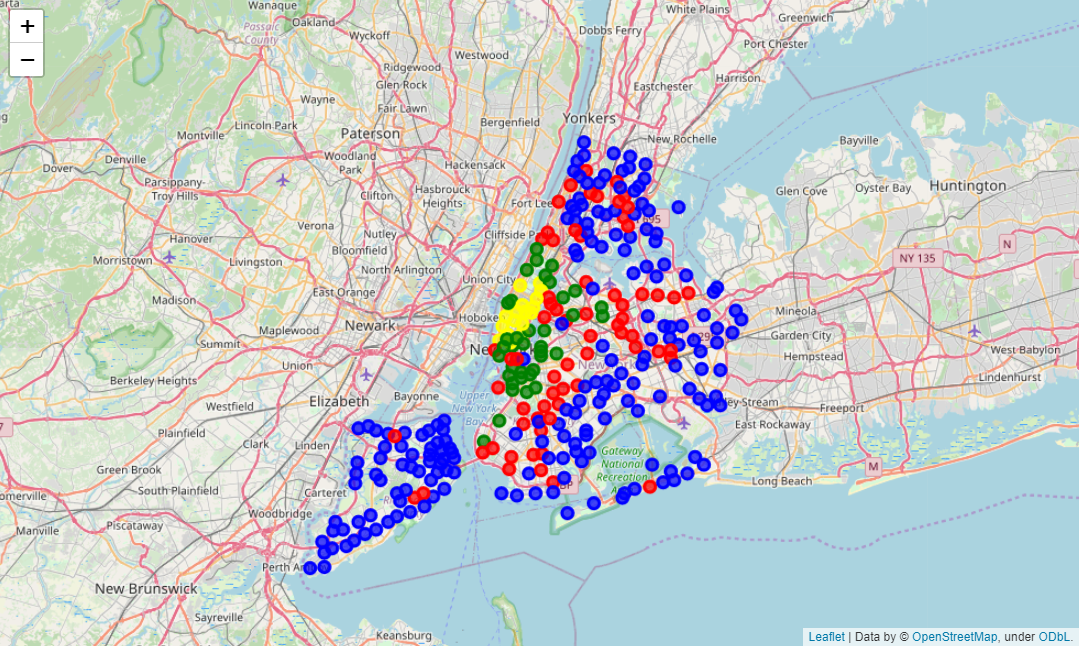

In [46]:
Image(filename='Images/NYC by clusters.png') 

Cluster 0 (RED):

In [57]:
df.loc[df['Cluster Labels'] == 0, df.columns[[4] + list(range(5, df.shape[1]))]]

Neighborhood  price1  price2  price3  price4
5                  Kingsbridge      40      28       1       1
11              Pelham Parkway      38       7       2       0
16                     Fordham      60      24       0       0
20                     Melrose      34       6       3       0
30                 Parkchester      30      21       4       2
33                 Morris Park      37      18       4       2
34                     Belmont      48      21       7       1
41                   Olinville      34      10       2       0
44                   Unionport      32      13       4       0
47                 Bensonhurst      37      22       0       0
52              Sheepshead Bay      31      26      11       1
53           Manhattan Terrace      35      13       1       1
54                    Flatbush      42      41       4       0
55               Crown Heights      48      26       5       1
57                  Kensington      45      14       1       0
58             Windsor Terrace      26      26       1       0
62                    Bushwick      50      43       7       0
63          Bedford Stuyvesant      59      28      10       1
67                    Red Hook      28      17       4       0
79                  Bath Beach      39      24       0       0
81               Dyker Heights      32      16       4       0
88   Prospect Lefferts Gardens      46      25       5       0
89                  Ocean Hill      35       6       1       0
93         Prospect Park South      40      35       2       0
98               Ocean Parkway      32      15       4       3
99               Fort Hamilton      32      30      10       1
101         Washington Heights      45      35       9       0
102                     Inwood      46      34      12       1
103           Hamilton Heights      57      34       9       1
104             Manhattanville      31      30      11       0
105             Central Harlem      35      30      16       1
110           Roosevelt Island      24      26       7       3
126          Battery Park City      33      22      11       5
129                   Woodside      60      39       4       0
133                     Corona      31      22       3       1
134               Forest Hills      35      31       5       0
137                   Flushing      57      37       1       1
138           Long Island City      53      30       5       1
139                  Sunnyside      40      27       2       1
140              East Elmhurst      31      10       5       1
141                    Maspeth      35      13       1       0
142                  Ridgewood      61      41       2       0
144                  Rego Park      45      23       0       0
150                    Bayside      35      37       5       0
151                 Auburndale      27      34       3       0
158                  Briarwood      38      14       1       0
159             Jamaica Center      35      17       1       1
172                   Steinway      35      40       4       2
177             Rockaway Beach      27      17       3       0
179                Murray Hill      34      52       3       0
188                Lefrak City      39      21       1       1
194               North Corona      31      17       3       0
195       Forest Hills Gardens      38      42       8       0
209                   New Dorp      28      16       2       0
220                    Wingate      39      12       2       1
230                 Grant City      25      22       2       1
255                   Elm Park      31      15       0       0
260              Jamaica Hills      37      16       1       1
265          Concourse Village      37      12       2       0
269              Hunters Point      35      43       6       1
276               Fulton Ferry      47      41       7       2
278                 Weeksville      37      12       4       0
280                      Dumbo      29      20   

Cluster 1(BLUE):

In [56]:
df.loc[df['Cluster Labels'] == 1, df.columns[[4] + list(range(5, df.shape[1]))]]

Neighborhood  price1  price2  price3  price4
0              Wakefield      20       6       1       0
1             Co-op City      23       9       2       0
2            Eastchester      20       9       4       0
3              Fieldston      20      12       3       0
4              Riverdale      15      13       0       0
6            Marble Hill      25      13       1       2
7               Woodlawn      24      10       0       0
8                Norwood      30      11       2       0
9         Williamsbridge      22      13       2       0
10            Baychester      28      12       2       1
12           City Island       6       7       8       1
13          Bedford Park      29       8       3       0
14    University Heights      25       6       3       1
15        Morris Heights      26       5       3       0
17          East Tremont      29       4       3       0
18            West Farms      18       4       3       0
19          High  Bridge      10       4       4       0
21            Mott Haven      25      10       5       1
22           Port Morris      12       7       1       0
23              Longwood      27       5       3       0
24           Hunts Point       7       2       3       1
25            Morrisania      26       7       1       0
26             Soundview      21       2       0       0
27          Clason Point       0       0       0       0
28           Throgs Neck      11      10       1       0
29          Country Club      26      11       2       1
31    Westchester Square      26      15       1       1
32              Van Nest      23       8       3       1
35        Spuyten Duyvil      15      11       0       0
36       North Riverdale      15      10       6       0
37            Pelham Bay      26      10       3       0
38         Schuylerville      21      12       1       1
39        Edgewater Park      18      13       1       0
40           Castle Hill       9       4       0       0
42        Pelham Gardens      13       7       2       0
43             Concourse      22       6       4       0
45              Edenwald      16       5       1       0
50             Gravesend      22       9       2       0
51        Brighton Beach      18      17       5       1
56         East Flatbush       4       5       4       0
60           Brownsville      27       6       2       0
71         Cypress Hills      20       4       1       1
72         East New York      12       4       0       0
73         Starrett City      19       6       0       1
74              Canarsie       8       6       0       1
75             Flatlands      16       8       3       0
76           Mill Island       5       2       0       0
77       Manhattan Beach      12      17       9       1
78          Coney Island      22      11       2       0
80          Borough Park      20       8       2       0
82       Gerritsen Beach      19       9       2       0
83           Marine Park      26       8       3       1
85              Sea Gate       2       2       0       0
90             City Line      27       5       2       1
91          Bergen Beach       3       3       1       0
92               Midwood      23      12       0       0
94            Georgetown      21      15       5       0
132         Howard Beach      19      13       3       0
135          Kew Gardens       9      12       3       1
136        Richmond Hill      12      20       3       1
143             Glendale      19      11       1       0
145            Woodhaven      28      13       1       0
146           Ozone Park      26      11       3       0
147     South Ozone Park      18       4       2       0
148        College Point      27       8       5       2
149           Whitestone      22      10       5       1
152          Little Neck      23      14       2       2
153           Douglaston      18      14       4       2
154            Glen Oaks      12       7       2       0
155            Bellero

Cluster 2(Green):

In [55]:
df.loc[df['Cluster Labels'] == 2, df.columns[[4] + list(range(5, df.shape[1]))]]

Neighborhood  price1  price2  price3  price4
46             Bay Ridge      51      49      16       0
48           Sunset Park      75      36       4       0
49            Greenpoint      43      65      18       1
59      Prospect Heights      50      91      10       2
61          Williamsburg      54      78      14       4
64      Brooklyn Heights      56      49      16       2
65           Cobble Hill      50      74      16       0
66       Carroll Gardens      49      73      12       1
68               Gowanus      55      53       7       1
69           Fort Greene      59      78      13       0
70            Park Slope      62      72       9       2
84          Clinton Hill      34      58       8       0
86              Downtown      55      53      13       0
87           Boerum Hill      52      74      16       0
95     East Williamsburg      56      56       4       1
96            North Side      49      84      20       3
97            South Side      54      77      19       3
100            Chinatown      56      74      28       5
106          East Harlem      66      38       9       1
108            Yorkville      64      80      22       2
111      Upper West Side      44      65      16       0
113              Clinton      32      59      19       4
119      Lower East Side      56      78      21       3
122                 Soho      42      58      43       0
124     Manhattan Valley      60      54      11       0
125  Morningside Heights      71      54      15       0
127   Financial District      50      40      19       4
128              Astoria      77      87       9       4
130      Jackson Heights      73      55       6       1
131             Elmhurst      82      53       4       1
185           Ravenswood      64      63      15       1
244        Carnegie Hill      64      59      19       2
245                 Noho      50      76      27       5
246         Civic Center      56      36      26       4
272      Stuyvesant Town      47      74      13       2
274    Sunnyside Gardens      48      49       5       1
298         Hudson Yards      40      53      21       3

Cluster 3(Yellow):

In [54]:
df.loc[df['Cluster Labels'] == 0, df.columns[[4] + list(range(5, df.shape[1]))]]

Neighborhood  price1  price2  price3  price4
5                  Kingsbridge      40      28       1       1
11              Pelham Parkway      38       7       2       0
16                     Fordham      60      24       0       0
20                     Melrose      34       6       3       0
30                 Parkchester      30      21       4       2
33                 Morris Park      37      18       4       2
34                     Belmont      48      21       7       1
41                   Olinville      34      10       2       0
44                   Unionport      32      13       4       0
47                 Bensonhurst      37      22       0       0
52              Sheepshead Bay      31      26      11       1
53           Manhattan Terrace      35      13       1       1
54                    Flatbush      42      41       4       0
55               Crown Heights      48      26       5       1
57                  Kensington      45      14       1       0
58             Windsor Terrace      26      26       1       0
62                    Bushwick      50      43       7       0
63          Bedford Stuyvesant      59      28      10       1
67                    Red Hook      28      17       4       0
79                  Bath Beach      39      24       0       0
81               Dyker Heights      32      16       4       0
88   Prospect Lefferts Gardens      46      25       5       0
89                  Ocean Hill      35       6       1       0
93         Prospect Park South      40      35       2       0
98               Ocean Parkway      32      15       4       3
99               Fort Hamilton      32      30      10       1
101         Washington Heights      45      35       9       0
102                     Inwood      46      34      12       1
103           Hamilton Heights      57      34       9       1
104             Manhattanville      31      30      11       0
105             Central Harlem      35      30      16       1
110           Roosevelt Island      24      26       7       3
126          Battery Park City      33      22      11       5
129                   Woodside      60      39       4       0
133                     Corona      31      22       3       1
134               Forest Hills      35      31       5       0
137                   Flushing      57      37       1       1
138           Long Island City      53      30       5       1
139                  Sunnyside      40      27       2       1
140              East Elmhurst      31      10       5       1
141                    Maspeth      35      13       1       0
142                  Ridgewood      61      41       2       0
144                  Rego Park      45      23       0       0
150                    Bayside      35      37       5       0
151                 Auburndale      27      34       3       0
158                  Briarwood      38      14       1       0
159             Jamaica Center      35      17       1       1
172                   Steinway      35      40       4       2
177             Rockaway Beach      27      17       3       0
179                Murray Hill      34      52       3       0
188                Lefrak City      39      21       1       1
194               North Corona      31      17       3       0
195       Forest Hills Gardens      38      42       8       0
209                   New Dorp      28      16       2       0
220                    Wingate      39      12       2       1
230                 Grant City      25      22       2       1
255                   Elm Park      31      15       0       0
260              Jamaica Hills      37      16       1       1
265          Concourse Village      37      12       2       0
269              Hunters Point      35      43       6       1
276               Fulton Ferry      47      41       7       2
278                 Weeksville      37      12       4       0
280                      Dumbo      29      20   